In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv('ps.csv')
df.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# null check

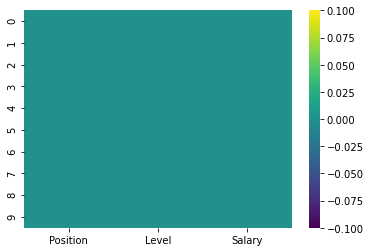

In [6]:
sns.heatmap(df.isnull(),yticklabels=True,cmap='viridis')

In [7]:
X=df.iloc[:,1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [8]:
Y=df.iloc[:,2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


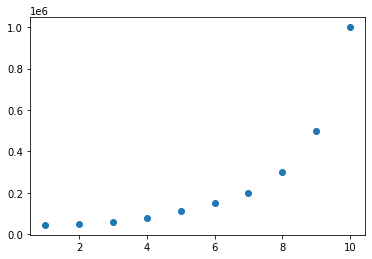

In [9]:
plt.scatter(X,Y)

# ready for split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)



# Linear regression

In [11]:
LR=LinearRegression()
LR.fit(X_train,Y_train)
y_pred=LR.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.8451346684575975

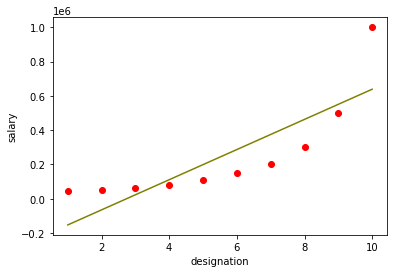

In [12]:
plt.scatter(X,Y,c='red')
plt.plot(X,LR.predict(X),c="olive")
plt.xlabel('designation')
plt.ylabel('salary')
plt.show()

In [13]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [14]:
level=float(input())
LR.predict([[level]])

6


array([[287068.96551724]])

# Polynomial regression 


#degree=2

In [15]:
df=pd.read_csv('ps.csv')
X=df.iloc[:,1:2]
Y=df.iloc[:,2:]

In [16]:
PF=PolynomialFeatures(degree=2)
X=PF.fit_transform(X)
X_train,X_test,Y_train,Y_testt=train_test_split(X,Y,test_size=0.2,random_state=42)


In [17]:
PR2=LinearRegression()
PR2.fit(X_train,Y_train)
y_pred=PR2.predict(X_test)
score=r2_score(Y_test,y_pred)
score

0.7666492889299867

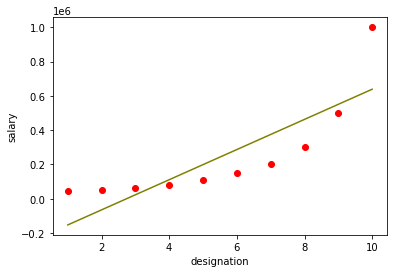

In [18]:
X=df.iloc[:,1:2]
plt.scatter(X,Y,c='red')
plt.plot(X,LR.predict(X),c="olive")
plt.xlabel('designation')
plt.ylabel('salary')
plt.show()

# # Polynomial regression 


#degree=5


In [21]:
df = pd.read_csv('ps.csv')
X1=df.iloc[:,1:2]
Y1=df.iloc[:,2:]
PF = PolynomialFeatures(degree=5)
X1 = PF.fit_transform(X1)
X_train, X_test,Y_train,Y_test=train_test_split(X1, Y1,test_size=0.3, random_state=42) 
PR5=LinearRegression()
PR5.fit(X_train, Y_train)
y_pred=PR5.predict(X_test)
score=r2_score(Y_test, y_pred)
score

0.9949078503291597

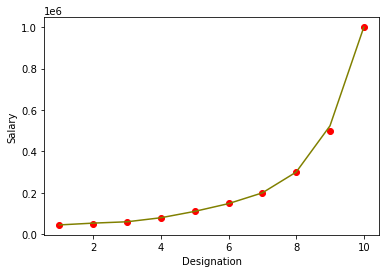

In [22]:
X=df.iloc[:,1:2]
plt.scatter(X, Y, c='red')
plt.plot(X, PR5.predict(PF.fit_transform(X)), c='olive')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [ ]:
level=float(input())
PR5.predict(PF.fit_transform([[level]]))